In [307]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

pre-analysis: 
tags: single tag stats; overlapped tag stats; recipe with multiple tags; 
instruction data

In [384]:
original = pd.read_csv('/Users/hetianbai/Desktop/Plated/nyu_recipe_data.csv')

In [386]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 18 columns):
external_id            2562 non-null object
title                  2562 non-null object
subtitle               1766 non-null object
carbs                  1148 non-null float64
fat                    1148 non-null float64
protein                1148 non-null float64
chef_id                2562 non-null int64
calories               2442 non-null object
cooking_tips           2427 non-null object
story                  2425 non-null object
ingredients_display    2562 non-null object
step_one               2558 non-null object
step_two               2557 non-null object
step_three             2556 non-null object
step_four              2553 non-null object
step_five              2551 non-null object
step_six               2524 non-null object
recipe_tags            2508 non-null object
dtypes: float64(3), int64(1), object(14)
memory usage: 360.4+ KB


In [311]:
df = pd.read_csv('/Users/hetianbai/Desktop/Plated/cleaned_recipe_data.csv')

In [1]:
df.info()

In [2]:
# total number of recipes:
print('total number of recipes:',df.shape[0])
# total number of tags: 
print('total number of tags:',tags.shape[1]+2)
print('total number of tags in model:',tags.shape[1])

Removed very rare tags: tag_cuisine_nordic, tag_cuisine_african

In [314]:
data = df[['carbs', 'fat','title',
       'protein','calories', 'step_one', 'step_two', 'step_three',
       'step_four', 'step_five', 'step_six',
       'tag_cuisine_indian',
       'tag_cuisine_asian', 'tag_cuisine_mexican',
       'tag_cuisine_latin-american', 'tag_cuisine_french',
       'tag_cuisine_italian',
       'tag_cuisine_mediterranean', 'tag_cuisine_american',
       'tag_cuisine_middle-eastern']]
data.columns = [['carbs', 'fat','title',
       'protein','calories', 'step_one', 'step_two', 'step_three',
       'step_four', 'step_five', 'step_six', 'Indian', 'Asian', 'Mexican','Latin-american',\
                 'French','Italian','Mediterranean','American','Middle-eastern']]
tags = data[['Indian', 'Asian', 'Mexican','Latin-american',\
                 'French','Italian','Mediterranean','American','Middle-eastern']]

In [316]:
tags_sum = pd.DataFrame(np.sum(tags,axis=0), columns=['counts'])

In [3]:
tags_sum

In [4]:
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14,8))

# Generate some sequential data
x = np.array(tags_sum.index)
y = np.array(tags_sum.counts)
sns.barplot(x, y,color="steelblue", ax=ax)
ax.set_ylabel("Number of recipe")
ax.set_xlabel("Cuisines")
plt.title('Number of Recipes by Cuisines')

Recipe with mutliple tags:

In [319]:
tags['sum'] = np.array(np.sum(tags,axis=1))

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [320]:
tags = tags[tags['sum']>0]
tags_multi = tags[tags['sum']>1]
del tags_multi['sum']

In [325]:
annot_count = np.zeros([9,9])
for i, tag1 in enumerate(list(tags_sum.index)):
    for j, tag2 in enumerate(list(tags_sum.index)):
        if i==j:
            annot_count[i][j] = int((np.array(np.sum(tags_multi[[tag1]],axis=1))>0).sum())
        else:   
            annot_count[i][j] = int((np.array(np.sum(tags_multi[[tag1,tag2]],axis=1))>1).sum())

In [353]:
for i, tag in enumerate(list(tags_sum.index)):
    annot_count[i][i] = int(tags[tags[tag]==1].shape[0])

heat map of recipe with maltiple tags

In [5]:
plt.figure(figsize = (12,12))
sns.set(font_scale=1.5)
sns.heatmap(tags_multi.corr(method='pearson', min_periods=1), annot = annot_count, vmax=.4, square=True, annot_kws={"size": 16})

In [369]:
def count_length(col):
    length = np.zeros(len(data[col]))
    for i,v in enumerate(list(data[col].values)):
        if isinstance(v, float):
            length[i] = 0
        else:
            length[i] = len(v.split())
    return length

In [370]:
for col in ['step_one', 'step_two', 'step_three', 'step_four', 'step_five', 'step_six']:
    n = col+'_length'
    data[n]=count_length(col)

data['mean_length'] = data.iloc[:, -7:-1].mean(axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


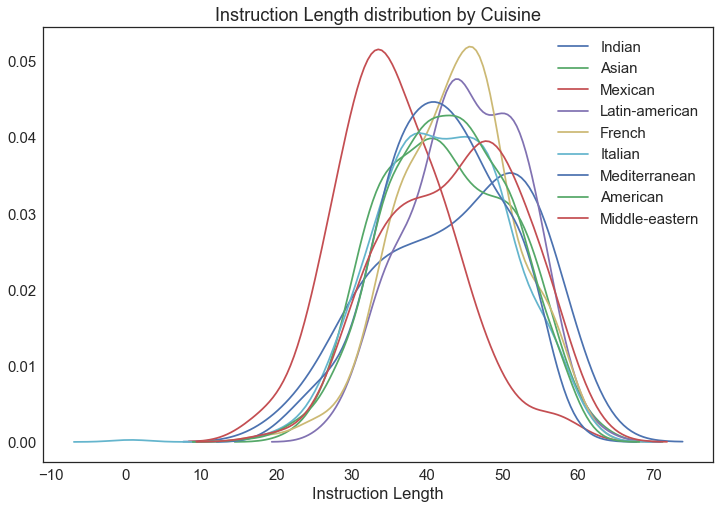

In [379]:
sns.set_style("white")
plt.figure(figsize = (12,8))
for tag in list(tags_sum.index):
    sns.distplot(data[data[tag]>0]['mean_length'], bins=50, label= tag, hist=False);
plt.legend()
plt.xlabel('Instruction Length')
plt.title('Instruction Length distribution by Cuisine')

### Single Tag statistics:

In [6]:
for tag in list(tags_sum.index):
    print('>>>>>', tag)
    print('* Numer of recipes', tags_sum.loc[tag].values)
    print('* Average Instruction length:', np.mean(data[data[tag] > 0]['mean_length']))
#    print('* Calories:', np.mean(int(data[data[tag] > 0]['calories'])))

### High frequent word statistics:

In [292]:
import string
import pickle as pkl
import random
from collections import Counter, defaultdict
from nltk.tokenize import word_tokenize
from collections import Counter

# lowercase and remove punctuation
def tokenizer(sent):
    #print(sent)
    if pd.isnull(sent):
        words = []
    else:
        table = str.maketrans(string.punctuation, ' '*len(string.punctuation))
        sent = sent.translate(table)
        tokens = word_tokenize(sent)
        # convert to lower case
        tokens = [w.lower() for w in tokens]
        # remove punctuation from each word
        #table = str.maketrans('', '', string.punctuation)
        #stripped = [w.translate(table) for w in tokens]
        # remove remaining tokens that are not alphabetic
        words = [word for word in tokens if word.isalpha()]
        #re.findall(r'\d+', 'sdfa')
    return words

def tokenize_dataset(step_n):
    """returns tokenization for each step, training set tokenizatoin"""
    token_dataset = []
    for sample in step_n:
        tokens = tokenizer(sample)
        token_dataset.extend(tokens)
    return token_dataset

In [306]:
for tag in list(tags_sum.index):
    words_bucket = []
    for step in ['step_one', 'step_two', 'step_three', 'step_four', 'step_five', 'step_six']:
        words_bucket.extend(tokenize_dataset(data[data[tag] > 0][step]))
    ordered_dict = Counter(words_bucket)
    print(tag)
    print(ordered_dict.most_common(260)[20:])

Indian
[('stir', 120), ('as', 119), ('about', 118), ('then', 115), ('pot', 115), ('from', 115), ('into', 114), ('rinse', 100), ('for', 99), ('rice', 96), ('remove', 94), ('remaining', 93), ('garlic', 87), ('bowl', 84), ('spinach', 83), ('ginger', 82), ('onion', 81), ('cut', 81), ('recipe', 81), ('tip', 81), ('when', 80), ('water', 78), ('tablespoon', 76), ('combine', 76), ('chicken', 74), ('see', 74), ('desired', 73), ('curry', 70), ('while', 70), ('halve', 69), ('serve', 68), ('stirring', 67), ('large', 66), ('on', 66), ('baking', 66), ('cilantro', 64), ('season', 64), ('discard', 63), ('oven', 60), ('set', 60), ('sheet', 60), ('aside', 59), ('mince', 59), ('olive', 59), ('small', 58), ('leaves', 58), ('inch', 57), ('bring', 57), ('transfer', 57), ('cauliflower', 56), ('cover', 56), ('reduce', 55), ('shimmering', 55), ('boil', 54), ('peel', 53), ('simmer', 52), ('serving', 52), ('paper', 51), ('stems', 51), ('lime', 51), ('through', 51), ('sauce', 50), ('towel', 49), ('half', 48), ('d

Latin-american
[('bowl', 511), ('lime', 508), ('remaining', 489), ('into', 486), ('olive', 473), ('desired', 466), ('for', 464), ('from', 458), ('then', 451), ('about', 444), ('high', 400), ('cut', 398), ('rinse', 396), ('tip', 380), ('tablespoon', 375), ('chicken', 374), ('set', 372), ('on', 363), ('aside', 357), ('half', 355), ('recipe', 348), ('cilantro', 342), ('stir', 331), ('onion', 329), ('season', 327), ('discarding', 326), ('garlic', 325), ('using', 322), ('cook', 321), ('when', 320), ('see', 310), ('while', 305), ('oven', 303), ('tortillas', 303), ('combine', 299), ('remove', 295), ('large', 285), ('shimmering', 277), ('transfer', 276), ('discard', 275), ('inch', 273), ('juice', 269), ('paper', 249), ('place', 248), ('baking', 237), ('the', 236), ('sheet', 234), ('slice', 232), ('black', 232), ('side', 231), ('serve', 227), ('chop', 227), ('towel', 224), ('small', 219), ('pot', 218), ('leaves', 216), ('or', 207), ('thinly', 207), ('layer', 206), ('toss', 204), ('dry', 201), (

Mediterranean
[('teaspoon', 418), ('into', 368), ('about', 365), ('from', 341), ('halve', 329), ('then', 324), ('lemon', 323), ('rinse', 322), ('cut', 315), ('high', 307), ('tablespoon', 301), ('set', 297), ('on', 286), ('stir', 286), ('aside', 283), ('desired', 283), ('remaining', 280), ('cook', 276), ('combine', 275), ('large', 275), ('garlic', 275), ('chicken', 267), ('for', 251), ('while', 248), ('season', 242), ('chop', 238), ('discarding', 235), ('remove', 233), ('inch', 231), ('oven', 227), ('pot', 225), ('recipe', 223), ('tip', 219), ('onion', 219), ('see', 213), ('when', 211), ('water', 206), ('half', 201), ('leaves', 197), ('paper', 194), ('baking', 193), ('stems', 192), ('towel', 189), ('toss', 186), ('tomatoes', 184), ('sheet', 183), ('dry', 183), ('shimmering', 183), ('roughly', 182), ('side', 181), ('transfer', 179), ('pat', 177), ('all', 173), ('serve', 167), ('parsley', 162), ('place', 160), ('top', 150), ('plates', 149), ('roast', 148), ('tablespoons', 148), ('divide',